<a href="https://colab.research.google.com/github/elenisproject/NewsCleanser/blob/master/notebooks/most_popular_news_source.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook we are going to Find the Most Popular News Source
<br>
<font size="3">
First we need to import all the needed libraries for this project
<br>
We our going to use:

- matplotlib
- pandas
- wordcloud
- regex
    </font>

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import collections
from collections import Counter,defaultdict,OrderedDict,namedtuple 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from datetime import datetime
import re

<br>
<font size="3">
After installing and importing everything we need to run our project, we will read our data from the output2.csv. This csv contains all the unfilterd data. We need this because we are going to search through the articles to find their sources and furthermore determine which are the most popular ones.
</font>
<br>
<br>

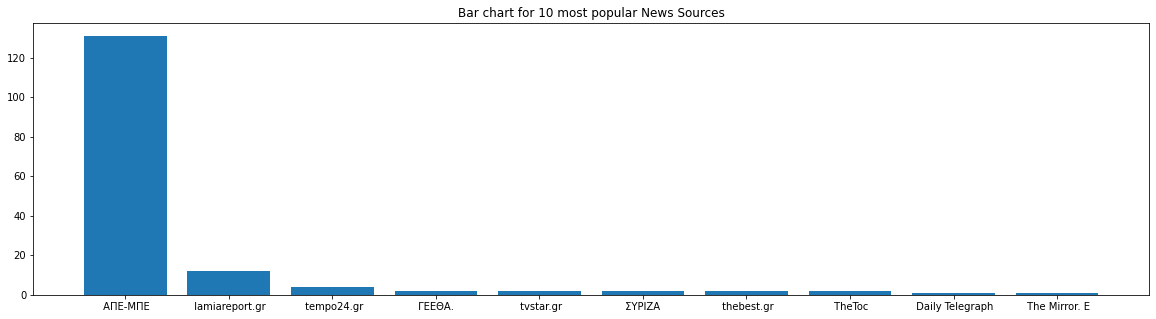

In [ ]:
#read the data from output2.csv file
df = pd.read_csv('output2.csv')

#fill all null values, otherwise there will be problems during our text editing
df = df.fillna(" ")

#function to print output from a given dictionary
def plot_barchart(mydict):
    source = []
    count = []

    for w in sorted(mydict, key=mydict.get, reverse=True):
        source.append(w)
        count.append(mydict[w])

    plt.figure(figsize=(20, 5))
    plt.bar(source[0:10], count[0:10])
    plt.title('Bar chart for 10 most popular News Sources')
    plt.show() 
    
#find all sentences that start with the word "πηγη" which means source in greek
text_combined = []
for x in df['article_body']:
    source_sentence = re.findall(r'πηγή.+',x)
    if source_sentence != []:
        value = source_sentence.pop()
        text_combined.append(value[5:35])

#after the first filter we realize that most sources are given are either in capitel Greek or engilish,
#based on this we do a second filtering
source_list = []
for x in text_combined:
    res = re.search(r'[Α-Ωa-zA-Z\.\-\s0-9]+',x)
    if res != None:
        grouped_text = res.group(0)
        # here we check and filter some common unrelative cases
        if len(grouped_text) > 4 or (re.search(r'\.',grouped_text) is None and len(grouped_text)>=4) :
            source_list.append(grouped_text)

#create a dictionary with key the source and value the number of times listed in our source_list
mydict = {}
my_set = set(source_list) 
for x in my_set:
    number = source_list.count(x)
    mydict.update({x:number})

# delete all the false sources
del mydict['. Ο Λ']
del mydict['. Ο Γ']
del mydict[' Η Γ']
del mydict['8Κ - HDMI 2.1']
del mydict[' LED ']
del mydict[' ΠΗΓΗ']
del mydict[' 13.660 ']
del mydict[' comfort food E']
del mydict['. Η 16']
del mydict[' Ο Κ']
del mydict[' Covid-19']
del mydict[' C. Ε']
del mydict['triple-double']
del mydict[' ΣΥΡΙΖΑ']
del mydict[' Android ']
del mydict[' Alpha Bank']
del mydict[' ΗΠΑ']
del mydict[' Ahval']
del mydict[' This picture was taken last w']
del mydict[' Η Ο']
del mydict[' https']

#add in one key all different names for the same source for ape
ape = mydict[' ΑΠΕ ΜΠΕ'] + mydict[' ΑΠΕ ΜΠΕ Γ'] + mydict[' ΑΠΕ-ΜΠΕ Δ']+ mydict[' ΑΠΕ-ΜΠΕ']+ mydict[' ΑΠΕ ']+ mydict[' ΑΠΕ-ΜΠΕ '] + mydict[' ΑΠΕ']

#update the dictionary and delete all the similar ones
mydict.update({' ΑΠΕ-ΜΠΕ':ape})
del mydict[' ΑΠΕ ΜΠΕ']
del mydict[' ΑΠΕ ΜΠΕ Γ']
del mydict[' ΑΠΕ-ΜΠΕ Δ']
del mydict[' ΑΠΕ ']
del mydict[' ΑΠΕ']
del mydict[' ΑΠΕ-ΜΠΕ ']

# do the same for tempo24.gr
tempo = mydict[' tempo24.gr'] + mydict[' tempo24.news']
mydict.update({' tempo24.gr':tempo})
del mydict[' tempo24.news']
   
#plot
plot_barchart(mydict)